## Imports

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
import statsmodels.stats.diagnostic as diag
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

random_state = 42

## Data Upload

In [100]:
df = pd.read_csv('Data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploratory Analysis

### Variable Categorization

#### **Numerical**

`Continuous`: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice

`Discrete`: Id, MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, MoSold, YrSold

#### **Categorical**
`Nominal`: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, MiscFeature, SaleType, SaleCondition

`Ordinal`: ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

### **¿Cuál es la distribución de los precios de las casas?**
Esto ayudará a entender el rango de precios dentro del conjunto de datos.

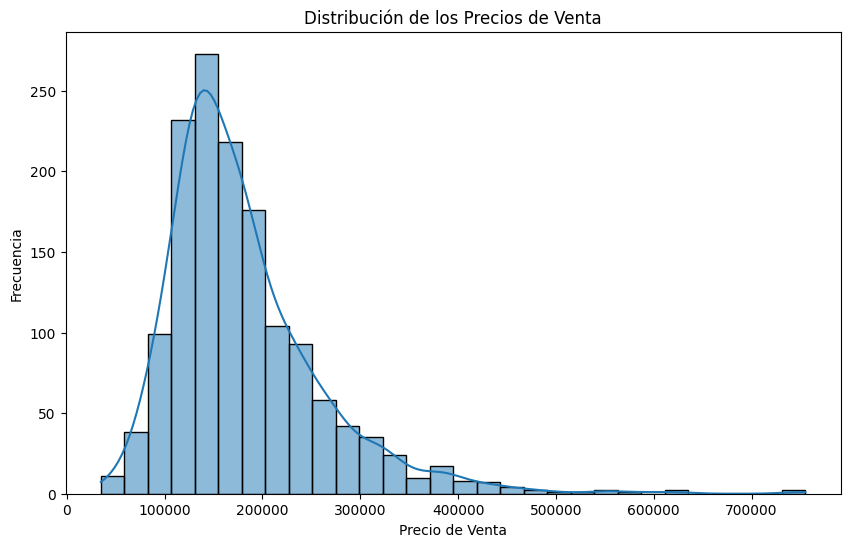

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribución de los Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

La distribución de los precios de venta es asimétrica hacia la derecha, lo que indica que las mayoría de casas están en el rango de precio más bajo con algunas excepciones de casas con precios muy altos.

### **¿Cómo se relaciona el área del lote (LotArea) con el precio de venta?**
Esto puede indicar si las propiedades más grandes tienden a tener precios más altos.

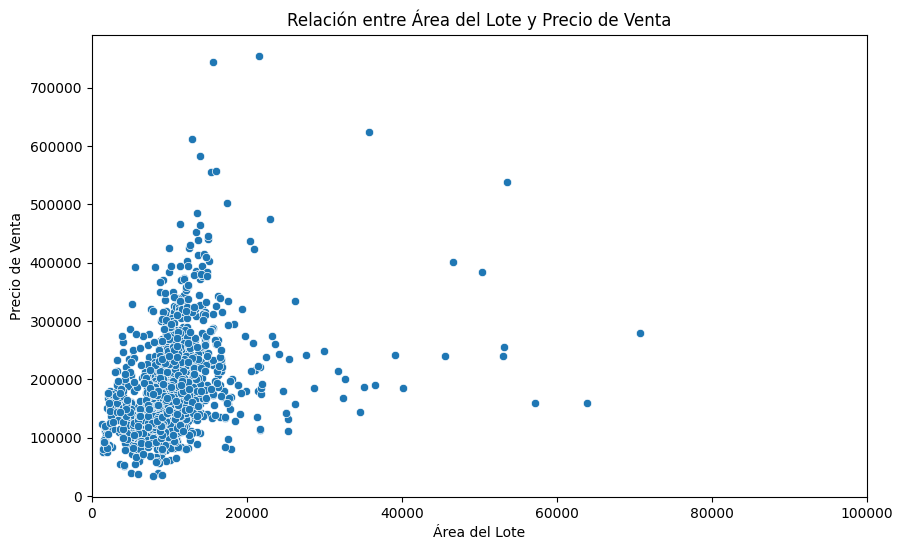

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('Relación entre Área del Lote y Precio de Venta')
plt.xlabel('Área del Lote')
plt.ylabel('Precio de Venta')
plt.xlim(0, 100000)
plt.show()

Hay una relación positiva entre el área del lote y el precio de venta. La mayoría de las ventas se concentran en lotes de menor tamaño y el aumento en el área del lote no garantiza un aumento proporcional en el precio de venta.

### **¿Influye la zona (MSZoning) en el precio de venta?**
Saber si ciertas zonas son más caras que otras puede ser crucial para la predicción de precios.

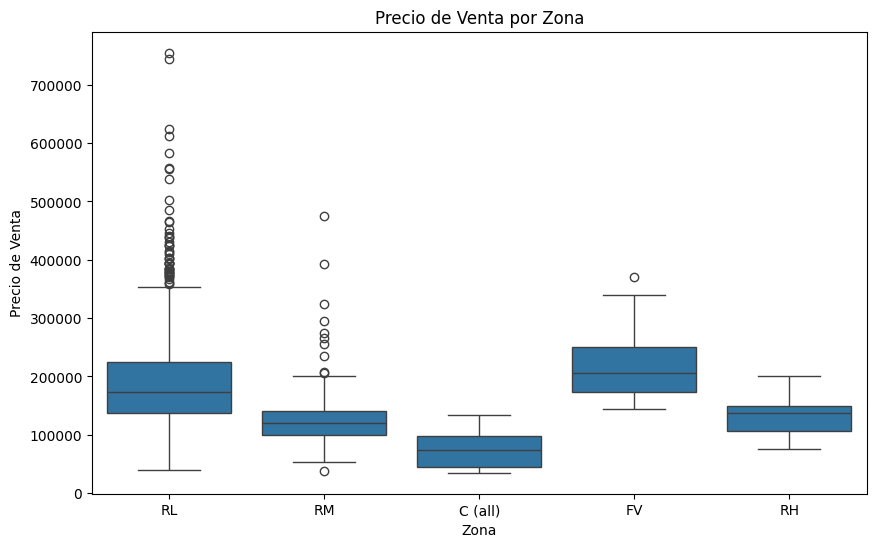

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.title('Precio de Venta por Zona')
plt.xlabel('Zona')
plt.ylabel('Precio de Venta')
plt.show()

Los precios de venta varían significativamente según la zona. Las zonas residenciales de baja densidad como RL tienden a tener precios de venta más altos en comparación con otras zonas.

### **¿Qué impacto tiene el año de construcción (YearBuilt) en el precio de venta?**
Esto permitirá ver si las casas más nuevas se venden a precios más altos.

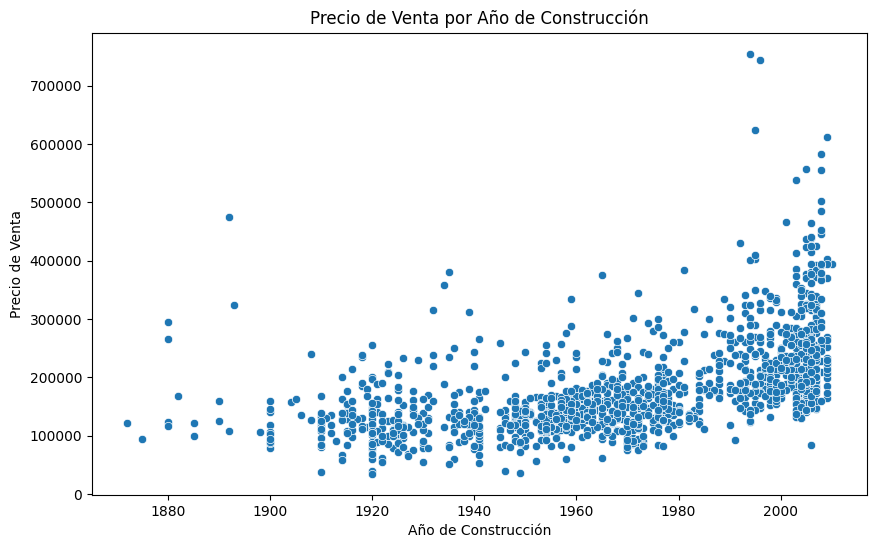

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.title('Precio de Venta por Año de Construcción')
plt.xlabel('Año de Construcción')
plt.ylabel('Precio de Venta')
plt.show()

Existe una tendencia general que indica que las casas más nuevas se venden a precios más altos, auqnue hay mucha variablidad en los precios de casas construidas en el mismo período.

### **¿Las características de calidad y condición (OverallQual y OverallCond) cómo afectan al precio de venta?**
Estas características podrían tener una fuerte correlación con el precio de venta.

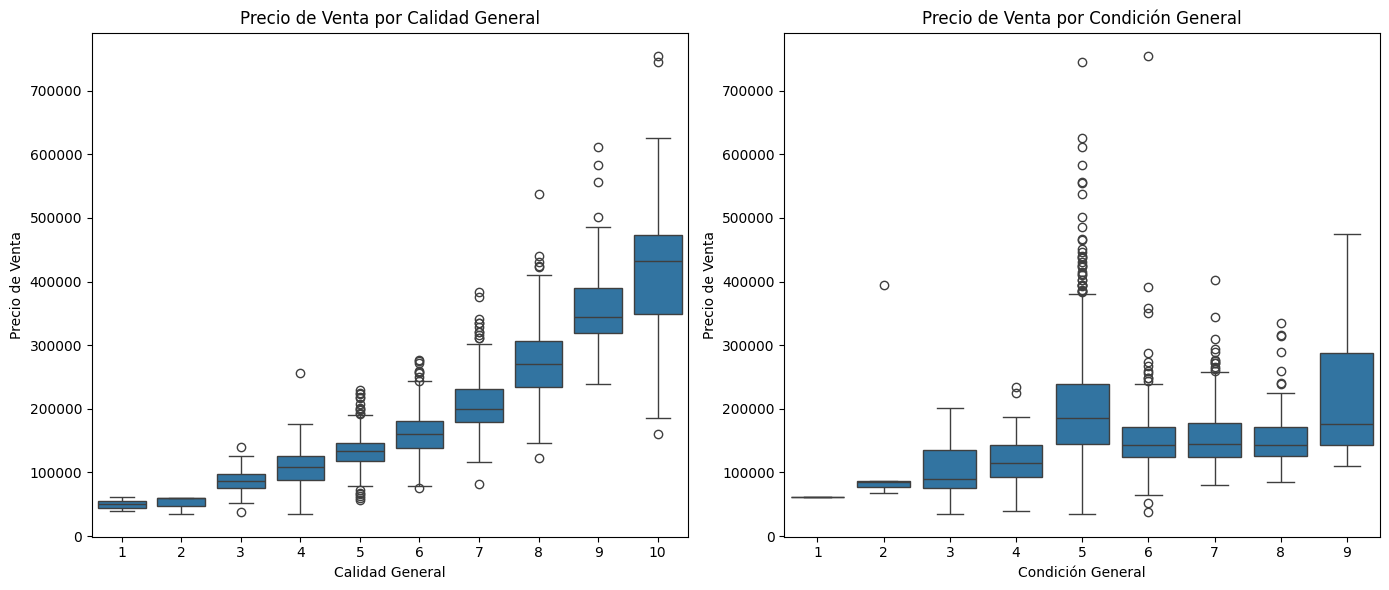

In [60]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Precio de Venta por Calidad General')
plt.xlabel('Calidad General')
plt.ylabel('Precio de Venta')

plt.subplot(1, 2, 2)
sns.boxplot(x='OverallCond', y='SalePrice', data=df)
plt.title('Precio de Venta por Condición General')
plt.xlabel('Condición General')
plt.ylabel('Precio de Venta')
plt.tight_layout()
plt.show()

Existe una relación muy clara y positiva entre la *calidad general* de la casa y su precio de venta. Las casas con calificaciones más altas de calidad general tienden a venderse a precios significativamente más altos.

La relación entre la *condición general* de la casa y el precio de venta es menos pronunciada que la de calidad general. Hay una variación en el precio de venta según la condición pero no es tan marcada.

### **¿Existe alguna tendencia temporal en los precios de las casas, basada en el mes (MoSold) o año de venta (YrSold)?**
Esto podría indicar si hay temporadas más propicias para la venta de casas.

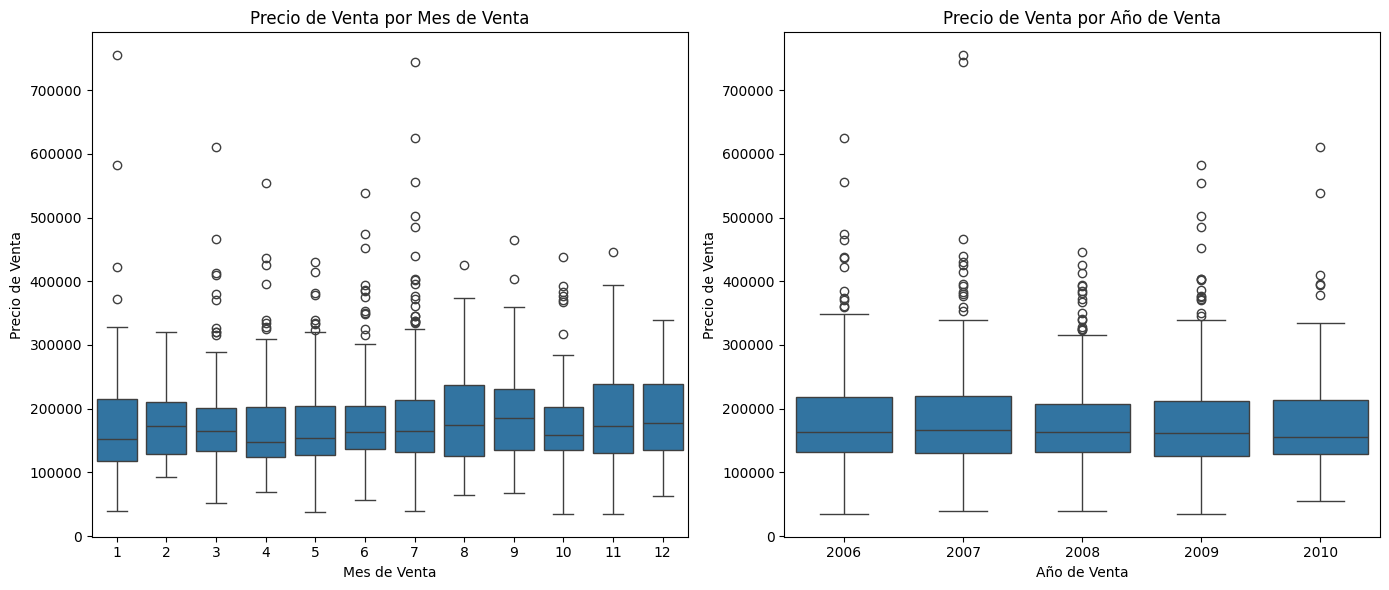

In [61]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='MoSold', y='SalePrice', data=df)
plt.title('Precio de Venta por Mes de Venta')
plt.xlabel('Mes de Venta')
plt.ylabel('Precio de Venta')

plt.subplot(1, 2, 2)
sns.boxplot(x='YrSold', y='SalePrice', data=df)
plt.title('Precio de Venta por Año de Venta')
plt.xlabel('Año de Venta')
plt.ylabel('Precio de Venta')
plt.tight_layout()
plt.show()

No se observan diferencias significativas en los precios de venta a lo largo de los meses del año. Esto indica que el mes de venta no tiene un impacto considerable en el precio de venta.

En cuanto al año de venta, tampoco se observan tendencias claras o cambios significativos en el precio de venta. Por lo que el año de venta, por sí solo, no es un determinante claro del precio de venta.

### **¿Cómo influye el número de baños en el precio de venta?**
Analiza el número total de baños (combinando baños completos y medios baños) afecta al precio de venta.

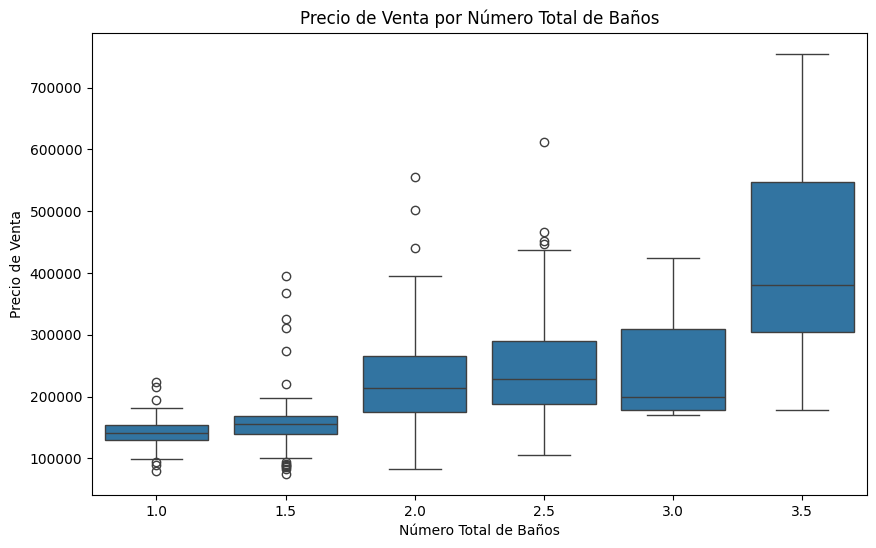

In [98]:
df['TotalBaths'] = df['FullBath'] + (0.5 * df['HalfBath'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalBaths', y='SalePrice', data=df)
plt.title('Precio de Venta por Número Total de Baños')
plt.xlabel('Número Total de Baños')
plt.ylabel('Precio de Venta')
plt.show()

Existe una relación positiva entre el número total de baños en una casa y su precio de venta. Las casas con más baños tienden a venderse a precios más altos, lo que sugiere que el número de baños es un factor importante para el valor de una propiedad.

### **¿El tener garaje aumenta el valor de una casa?**
Comparación de los precios de venta de las casas con y sin garaje.

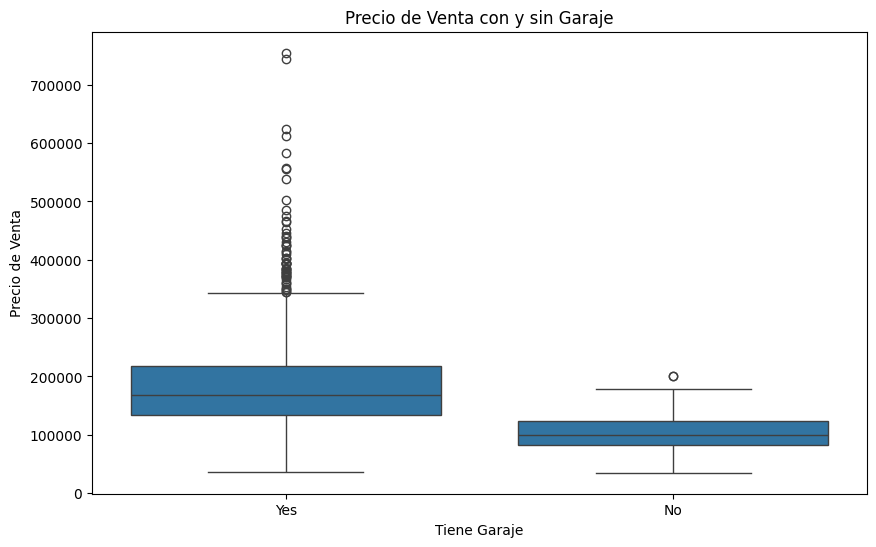

In [101]:
df['HasGarage'] = df['GarageType'].apply(lambda x: 'Yes' if pd.notnull(x) else 'No')
plt.figure(figsize=(10, 6))
sns.boxplot(x='HasGarage', y='SalePrice', data=df)
plt.title('Precio de Venta con y sin Garaje')
plt.xlabel('Tiene Garaje')
plt.ylabel('Precio de Venta')
plt.show()

Se puede evidenciar con claridad que las casas con garaje generalmente se venden a precios más altos en comparación con las casas sin garaje.

### **¿La presencia de una piscina influye en el precio de venta?**
Análisis si las casas con piscina se venden a un precio significativamente diferente en comparación con las que no tienen.

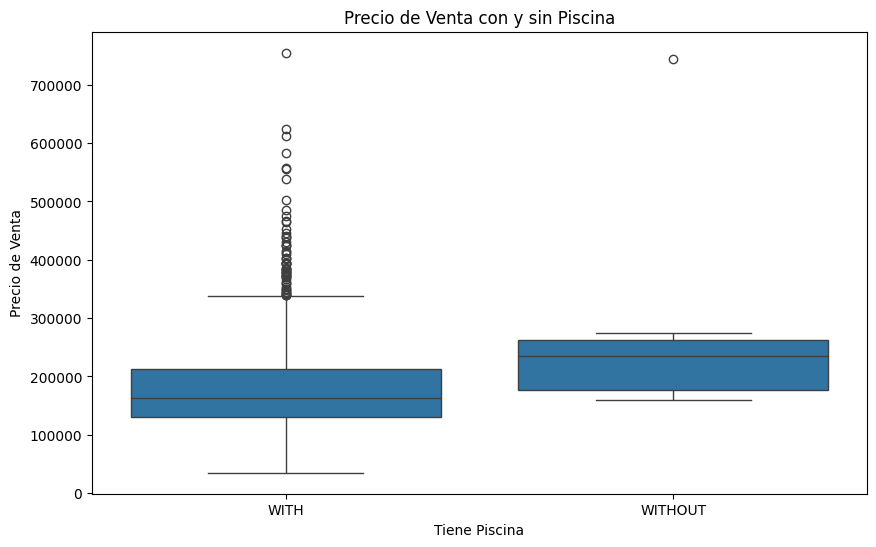

In [105]:
df['HasPool'] = df['PoolArea'].apply(lambda x: 'WITHOUT' if x > 0 else 'WITH')
plt.figure(figsize=(10, 6))
sns.boxplot(x='HasPool', y='SalePrice', data=df)
plt.title('Precio de Venta con y sin Piscina')
plt.xlabel('Tiene Piscina')
plt.ylabel('Precio de Venta')
plt.show()

El análisis muestra que las casas con piscina pueden alcanzar precios de venta más altos que las casas sin piscina. Sin embargo, el número de casas con piscina en el conjunto de datos parece ser limitado, lo que podría indica que aunque una piscina puede agregar valor a una propiedad, no es una característica común en todas las áreas o rangos de precio.

### **¿Cuál es el efecto de la zona de ubicación (frontal, adjunta, etc.) en el precio de venta?**
Análisis de la ubicación de la casa dentro de su entorno (por ejemplo, frente a un parque, lago, etc.) afecta su precio de venta.

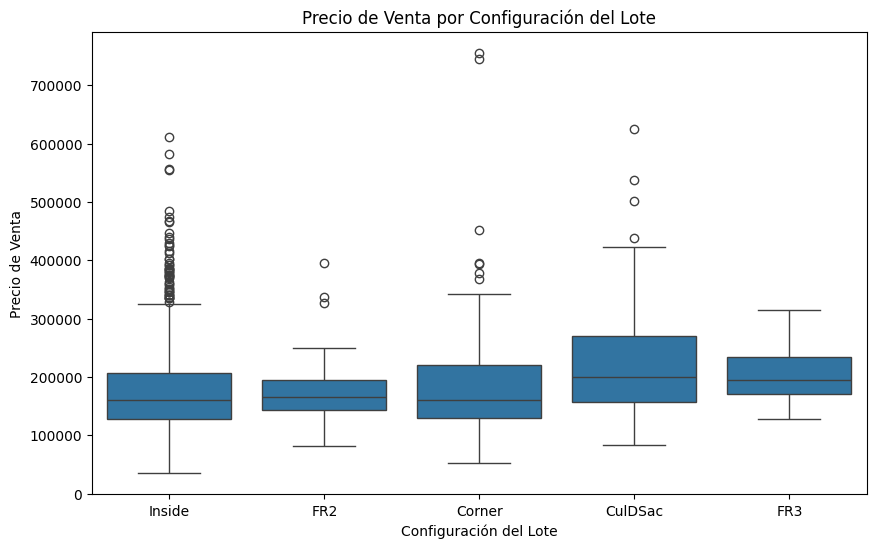

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotConfig', y='SalePrice', data=df)
plt.title('Precio de Venta por Configuración del Lote')
plt.xlabel('Configuración del Lote')
plt.ylabel('Precio de Venta')
plt.show()

El precio de venta varía según la configuración del lote, este resultado sugiere que la ubicación específica de la casa dentro de su entorno juega un papel significativo para el valor de venta. 

### Descriptive Statistics

#### General Information of DF

In [62]:
df.shape

(1460, 81)

In [63]:
df_describe = df.loc[:, df.columns != 'Id']
df_describe.describe(include=[np.number])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Variable Distribution Type

In [65]:
df_numerical = df_describe.select_dtypes(include=[np.number])
df_numerical

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [66]:
df_numerical_cp = df_numerical
for column in df_numerical_cp:
    colData = df_numerical_cp[column].dropna()
    stat, p_value = diag.lilliefors(colData.values)
    if p_value <= 0.05:
        print(f'{column}: Does not follow a normal distribution.')
    else:
        print(f'{column}: Follows a normal distribution.')

MSSubClass: Does not follow a normal distribution.
LotFrontage: Does not follow a normal distribution.
LotArea: Does not follow a normal distribution.
OverallQual: Does not follow a normal distribution.
OverallCond: Does not follow a normal distribution.
YearBuilt: Does not follow a normal distribution.
YearRemodAdd: Does not follow a normal distribution.
MasVnrArea: Does not follow a normal distribution.
BsmtFinSF1: Does not follow a normal distribution.
BsmtFinSF2: Does not follow a normal distribution.
BsmtUnfSF: Does not follow a normal distribution.
TotalBsmtSF: Does not follow a normal distribution.
1stFlrSF: Does not follow a normal distribution.
2ndFlrSF: Does not follow a normal distribution.
LowQualFinSF: Does not follow a normal distribution.
GrLivArea: Does not follow a normal distribution.
BsmtFullBath: Does not follow a normal distribution.
BsmtHalfBath: Does not follow a normal distribution.
FullBath: Does not follow a normal distribution.
HalfBath: Does not follow a nor

#### Frequency Tables

In [67]:
for column in df.columns:
    if df[column].dtype != 'O' and column != 'MSSubClass':
        continue

    freqTable = df[column].value_counts().reset_index()

    freqTable.columns = [column, 'Frequency']

    # Table formatting
    freqTable[column] = freqTable[column].astype(str).str.center(20)
    freqTable['Frequency'] = freqTable['Frequency'].astype(str).str.center(20)
    freqTable.columns = [col.center(20) for col in freqTable.columns]

    print(f"Frequency Table for {column}:\n{freqTable}\n")

Frequency Table for MSSubClass:
         MSSubClass            Frequency      
0            20                   536         
1            60                   299         
2            50                   144         
3           120                    87         
4            30                    69         
5           160                    63         
6            70                    60         
7            80                    58         
8            90                    52         
9           190                    30         
10           85                    20         
11           75                    16         
12           45                    12         
13          180                    10         
14           40                    4          

Frequency Table for MSZoning:
         MSZoning             Frequency      
0           RL                   1151        
1           RM                   218         
2           FV                    65         
3

#### NaN Value Analysis

In [68]:
nullValues = df.isnull().sum()
nullValues = nullValues[nullValues > 0]
print("Columns with NaN values:")
print(nullValues)

Columns with NaN values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### Correlation and Relationships

In [69]:
#label_encoder = preprocessing.LabelEncoder()
salePriceData = df['SalePrice']
df_numerical_cp = df.loc[:, df.columns != 'Id']
df_numerical_cp = df_numerical_cp.select_dtypes(include=[np.number])

for col in df_numerical_cp.columns:
    colData = df_numerical_cp[col]
    corr, p_value = spearmanr(salePriceData, colData)
    if corr >= 0.50:
        print(f"Column '{col}' spearman correlation coefficient:", corr)

Column 'OverallQual' spearman correlation coefficient: 0.8098285862017292
Column 'YearBuilt' spearman correlation coefficient: 0.6526815462850586
Column 'YearRemodAdd' spearman correlation coefficient: 0.5711589780582342
Column 'TotalBsmtSF' spearman correlation coefficient: 0.6027254448924096
Column '1stFlrSF' spearman correlation coefficient: 0.5754078354212824
Column 'GrLivArea' spearman correlation coefficient: 0.7313095834659141
Column 'FullBath' spearman correlation coefficient: 0.6359570562496957
Column 'TotRmsAbvGrd' spearman correlation coefficient: 0.5325859351169929
Column 'Fireplaces' spearman correlation coefficient: 0.5192474498367013
Column 'GarageCars' spearman correlation coefficient: 0.6907109670497434
Column 'GarageArea' spearman correlation coefficient: 0.6493785338868229
Column 'SalePrice' spearman correlation coefficient: 1.0


### Data visualization

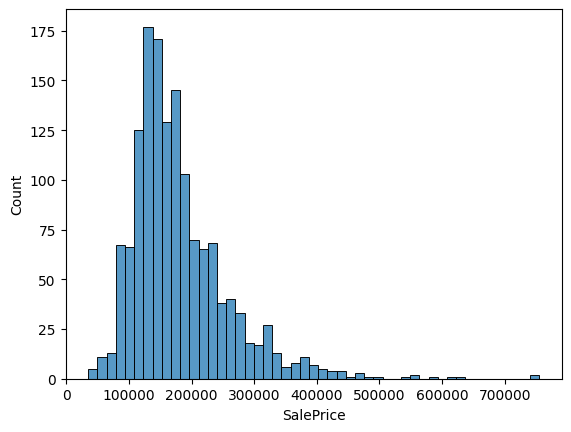

In [70]:
sns.histplot(x='SalePrice', data=df, )
plt.show()

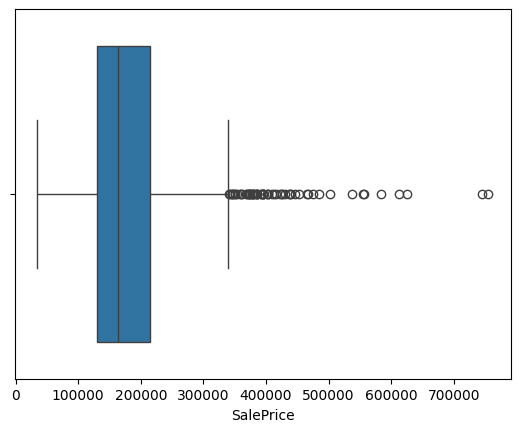

In [71]:
sns.boxplot(x='SalePrice', data=df, )
plt.show()

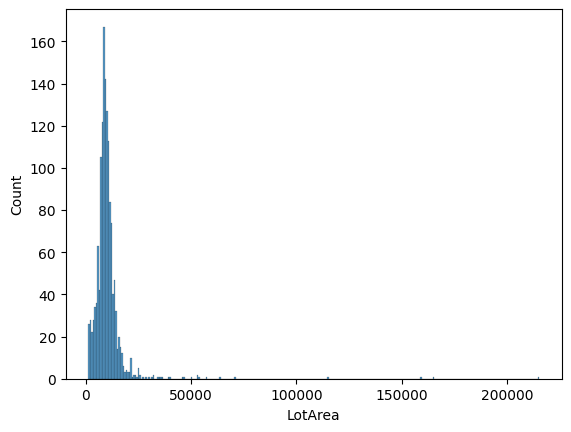

In [72]:
sns.histplot(x='LotArea', data=df, )
plt.show()

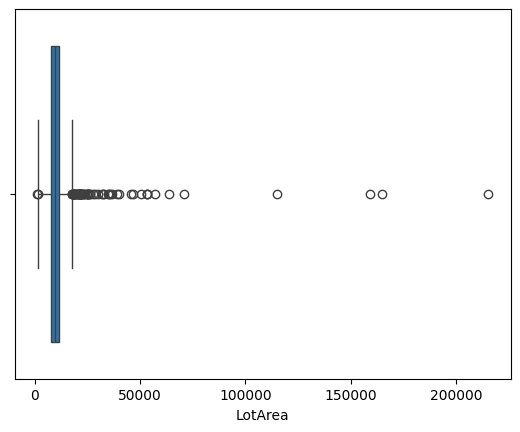

In [73]:
sns.boxplot(x='LotArea', data=df, )
plt.show()

## Data Preprocessing

### Handling Missing Values

In [74]:
# Remove rows with missing values in 'MasVnrType', 'MasVnrArea', and 'Electrical' columns.
df.dropna(subset=['MasVnrType', 'MasVnrArea', 'Electrical'], inplace=True)

In [75]:
# Impute missing LotFrontage values based on the median LotFrontage within each neighborhood.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [76]:
# Fill missing values in FireplaceQu with 'None'.
df['FireplaceQu'].fillna('None', inplace=True)

/var/folders/1_/typt0bhn7_q_v0p0c8csdvmh0000gn/T/ipykernel_1708/1886748092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('None', inplace=True)


In [77]:
# Fill missing values in garage-related variables with 'None'.
df['GarageType'].fillna('None', inplace=True)
df['GarageYrBlt'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)

/var/folders/1_/typt0bhn7_q_v0p0c8csdvmh0000gn/T/ipykernel_1708/711302466.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageType'].fillna('None', inplace=True)
/var/folders/1_/typt0bhn7_q_v0p0c8csdvmh0000gn/T/ipykernel_1708/711302466.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [78]:
# Fill missing values in basement-related variables with 'None'.
df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)

/var/folders/1_/typt0bhn7_q_v0p0c8csdvmh0000gn/T/ipykernel_1708/1267149368.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtQual'].fillna('None', inplace=True)
/var/folders/1_/typt0bhn7_q_v0p0c8csdvmh0000gn/T/ipykernel_1708/1267149368.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [79]:
# Drop columns with a high count of missing values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

### Encoding

In [80]:
nominalFeatures = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType',
                    'SaleCondition','PavedDrive']

ordinalFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu',
                    'GarageQual', 'GarageCond']

otherOrdinalFeatures = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']


In [81]:
df = pd.get_dummies(df, columns = nominalFeatures)

In [82]:
ordinalCategories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in ordinalFeatures]

ordinalEncoder = OrdinalEncoder(categories=ordinalCategories)
ordinalEncoded = ordinalEncoder.fit_transform(df[ordinalFeatures])

for i, feature in enumerate(ordinalFeatures):
    df[feature] = ordinalEncoded[:, i]

In [83]:
encodingCategories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], # Functional
    ['None', 'Unf', 'RFn', 'Fin']  # GarageFinish
]

ordinalEncoder = OrdinalEncoder(categories=encodingCategories)
ordinalEncoded = ordinalEncoder.fit_transform(df[otherOrdinalFeatures])

for i, feature in enumerate(otherOrdinalFeatures):
    df[feature] = ordinalEncoded[:, i]

### Splitting DataSet

In [84]:
df_cp = df.copy()
y = df_cp.pop('SalePrice')
X = df_cp

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=random_state)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(423, 191)
(118, 191)
(47, 191)


291 registros de test, 1043 de train y de esos 116 para validar. Se decidio hacer esta particion asi po

### Feature Engineering

In [87]:
X_train_cp = X_train.copy()

#### Feature Creation

In [88]:
X_train_cp['HouseAge'] = X_train_cp['YrSold'] - X_train_cp['YearBuilt']
X_train_cp['TotalFullBathrooms'] = X_train_cp['FullBath'] + X_train_cp['BsmtFullBath']
X_train_cp['TotalHalfBathrooms'] = X_train_cp['BsmtHalfBath'] + X_train_cp['HalfBath']

In [89]:
X_train_cp

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y,HouseAge,TotalFullBathrooms,TotalHalfBathrooms
283,284,20,74.0,9612,8,5,2008,2009,72.0,4.0,...,False,False,False,True,False,False,True,1,2,0
1268,1269,50,80.0,14100,8,9,1935,1997,632.0,3.0,...,False,False,True,False,False,False,True,73,3,1
969,970,190,75.0,10382,6,5,1958,1958,105.0,3.0,...,False,False,True,False,False,False,True,48,2,0
1355,1356,80,102.0,10192,7,6,1968,1992,143.0,3.0,...,False,False,True,False,False,False,True,38,3,0
347,348,20,80.0,17600,6,5,1960,1960,30.0,3.0,...,False,False,True,False,False,False,True,49,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1004,90,80.0,11500,5,6,1976,1976,164.0,3.0,...,False,False,True,False,False,False,True,31,2,0
260,261,80,120.0,19296,6,5,1962,1962,399.0,3.0,...,False,False,True,False,False,False,True,47,2,0
1295,1296,20,70.0,8400,5,5,1968,1968,168.0,3.0,...,False,False,True,False,False,False,True,38,2,1
1251,1252,120,86.5,3136,7,5,2003,2003,163.0,4.0,...,False,False,True,False,False,False,True,3,2,0


#### Feature Selection

In [90]:
columnNames = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
               'HouseAge', 'TotalFullBathrooms', 'TotalHalfBathrooms']
X_train_cp = selected_columns = X_train_cp.loc[:, columnNames]
X_train_cp

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,HouseAge,TotalFullBathrooms,TotalHalfBathrooms
283,8,2008,2009,1468,1468,1468,2,6,1,3,898,1,2,0
1268,8,1935,1997,728,1968,3447,3,11,2,3,1014,73,3,1
969,6,1958,1958,588,1095,1095,1,6,0,1,264,48,2,0
1355,7,1968,1992,570,1222,1920,3,8,1,2,487,38,3,0
347,6,1960,1960,1478,1478,1478,2,6,2,2,498,49,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,5,1976,1976,1680,1680,1680,2,8,0,2,528,31,2,0
260,6,1962,1962,1362,1382,1382,1,6,1,2,884,47,2,0
1295,5,1968,1968,1052,1052,1052,1,5,0,1,288,38,2,1
1251,7,2003,2003,1405,1405,1405,2,6,1,2,478,3,2,0


## Conclusiones sobre el set de datos
- Variables como el área del lote, la calidad general, la condición, la presencia de un garaje, y el número de baños tienen una relación notable con el precio de venta de las casas. Estos factores son indicativos del valor percibido por los compradores y pueden ser cruciales para la modelización predictiva.
- Características específicas como la presencia de piscina, el tipo de zona (MSZoning), el año de construcción, y la configuración del lote (LotConfig) afectan significativamente el precio de venta. Estos elementos destacan la necesidad de considerar tanto los atributos cuantitativos como cualitativos en el análisis.

## Linear Regressions

### First Iteration

In [91]:
salePrice = y_train.values.reshape(-1,1)
salePrice_v = y_valid.values.reshape(-1,1)
overallQual = X_train_cp['OverallQual'].values.reshape(-1,1)
overallQual_v = X_valid['OverallQual'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(overallQual, salePrice)
salePrice_pred = lm.predict(overallQual_v)

In [92]:
m = lm.coef_[0][0]
c = lm.intercept_[0]
label = r'$salePrice = %0.4f*overallQual %+0.4f$'%(m,c)
print(label)

$salePrice = 51064.6699*overallQual -130425.3136$


Text(0.5, 1.0, 'Validation Set - Sale Price vs Overall Quality')

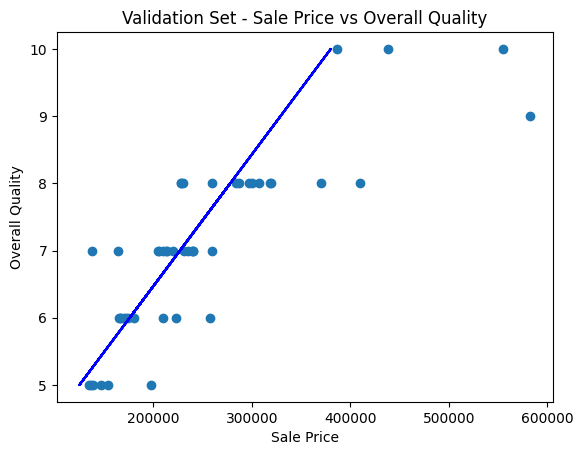

In [93]:
fig = plt.figure()
plt.scatter(salePrice_v,overallQual_v)
plt.plot(salePrice_pred, overallQual_v, color="blue")
plt.xlabel("Sale Price")
plt.ylabel("Overall Quality")
plt.title("Validation Set - Sale Price vs Overall Quality")

In [94]:
print("Mean Squared Error: %.2f"%mean_squared_error(salePrice_v,salePrice_pred))
print("R squared: %.2f"%r2_score(salePrice_v,salePrice_pred))

Mean Squared Error: 3608501966.57
R squared: 0.63


##### Residual Analysis

In [95]:
residuals = salePrice_v - salePrice_pred
len(residuals)

47

Text(0, 0.5, 'Residuales')

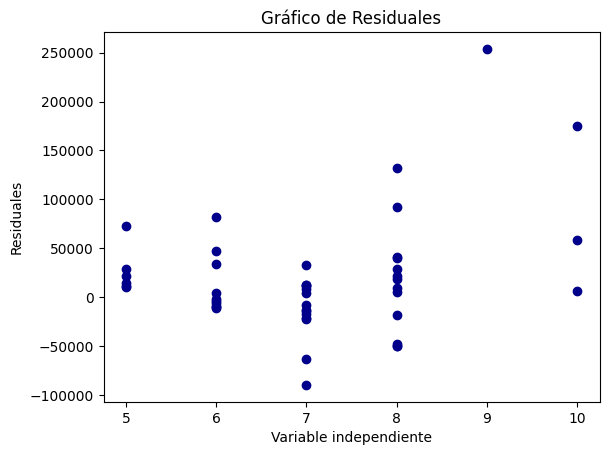

In [96]:
plt.plot(overallQual_v, residuals, 'o', color='darkblue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

Text(0.5, 1.0, 'Residuales')

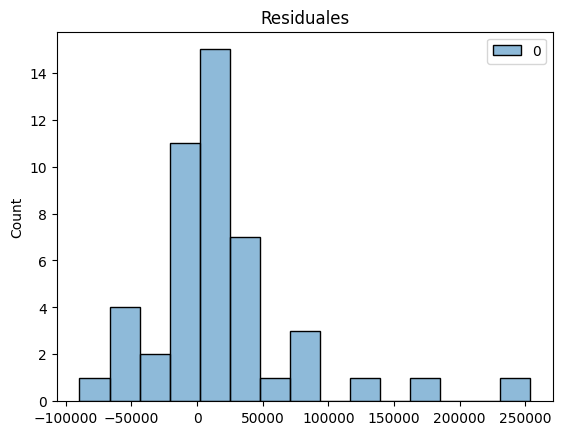

In [97]:
sns.histplot(residuals)
plt.title("Residuales")